In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [114]:
df = pd.read_csv("tmdb-movies.csv")

In [115]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [116]:
df = df[df.genres.isnull()==False]

In [117]:
df = df[df.production_companies.isnull()==False]

In [118]:
df = df.drop(['id','imdb_id','original_title','homepage','tagline','keywords','overview','release_date'],axis=1)

In [119]:
df = df.drop(['cast','production_companies'],axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x21058ff4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x21058ff41f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21058ff4ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x210591c1a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x210591c1a00>],
 'means': []}

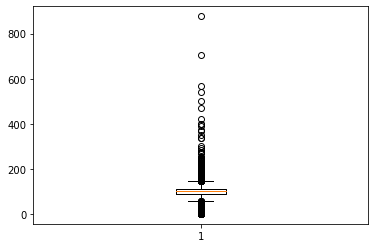

In [120]:
plt.boxplot(df.runtime)

In [121]:
con = []
for i in range(0,len(df)):
    p=df.genres.iloc[i]
    p = str(p)
    t = p.split('|')
    for j in t:
        if j in con:
            continue
        else:
            con.append(j)

In [122]:
df[con] = 0

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       9827 non-null   float64
 1   budget           9827 non-null   int64  
 2   revenue          9827 non-null   int64  
 3   director         9807 non-null   object 
 4   runtime          9827 non-null   int64  
 5   genres           9827 non-null   object 
 6   vote_count       9827 non-null   int64  
 7   vote_average     9827 non-null   float64
 8   release_year     9827 non-null   int64  
 9   budget_adj       9827 non-null   float64
 10  revenue_adj      9827 non-null   float64
 11  Action           9827 non-null   int64  
 12  Adventure        9827 non-null   int64  
 13  Science Fiction  9827 non-null   int64  
 14  Thriller         9827 non-null   int64  
 15  Fantasy          9827 non-null   int64  
 16  Crime            9827 non-null   int64  
 17  Western      

In [124]:
for i in range(0,len(df)):
    p=df.genres.iloc[i]
    p = str(p)
    t = p.split('|')
    for k in t:
        if k != '':
            df[k].iloc[i] = 1

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [125]:
df

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,...,0,0,0,0,0,0,0,0,0,0
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,...,0,0,0,0,0,0,0,0,0,0
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,Bruce Brown,95,Documentary,11,7.4,1966,0.000000e+00,...,0,0,0,0,0,0,0,1,0,0
10862,0.065543,0,0,John Frankenheimer,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
10863,0.065141,0,0,Eldar Ryazanov,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,...,1,1,0,0,0,0,0,0,0,0
10864,0.064317,0,0,Woody Allen,80,Action|Comedy,22,5.4,1966,0.000000e+00,...,1,0,0,0,0,0,0,0,0,0


In [126]:
len(df.columns)

31

In [128]:
df = df.drop(['genres'],axis = 1)

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
df['director'] = LabelEncoder.fit_transform(df,df['director'])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:117: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.classes_, y = _unique(y, return_inverse=True)


In [131]:
df = df.drop('release_year',axis=1)

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('popularity',axis=1)
y = df['popularity']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [135]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [136]:
linreg.score(X_test,y_test)

0.7348247436783717

In [143]:
xgb = XGBRegressor(n_estimators=50)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [144]:
xgb.score(X_test,y_test)

0.5836697781105052

In [137]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)

In [138]:
ada.score(X_test,y_test)

0.6363811855675683

In [139]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [140]:
rf.score(X_test,y_test)

0.7598590839467816